# SVM - Support Vector Machine
SVMs are based on the idea of **finding one or more hyperplane that best divides a dataset into two or more classes**, as shown in SVM classification. **The data points closest to the hyperplane are the support vectors, and they are the critical elements of the dataset**.
- SVM is used for both classification and regression problems. However, it is most commonly used in **Classification Problems**
- SVMs are effective in cases where **<u><font color = "red">the number of dimensions is greater than the number of samples</font></u>**.


**"Support"**: The decision boundary is determined by the position and orientation of the hyperplane. The data points that **support or define the hyperplane** are the "support vectors".

**Hyperplane**: The hyperplane is the decision boundary that separates the classes. The best hyperplane is the one that has the **largest margin, i.e., the maximum distance between data points of both classes**.

**Kernel Trick**: When data is not linearly separable, SVM can use a kernel trick to transform the input space into a higher-dimensional space where a hyperplane can be used to separate the data.

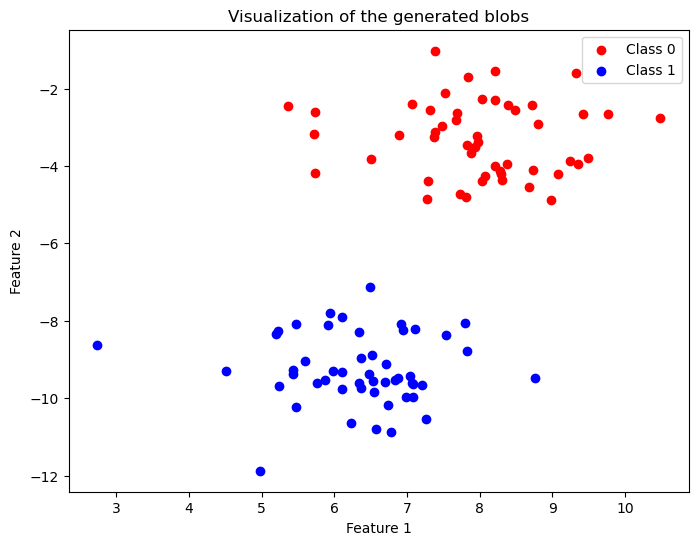

In [3]:
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Scatter plot the points with different colors for each class
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Label the axes, add a title and a legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of the generated blobs')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
clf = svm.SVC(kernel='linear')  # 'linear' specifies the kernel type

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# svm.SVM
C: Regularization parameter. The strength of the regularization is inversely proportional to C. It must be strictly positive. The penalty is a squared l2 penalty. A high value of C tells the model to give high importance to fitting the training dataset well, which could lead to overfitting. A lower value will make the model smoother and more generalizable.

kernel: Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed', or a callable. If none is given, 'rbf' will be used. The kernel transforms the data into another dimension that has a clear division between classes.

- 'linear': No mapping into higher dimensions; direct decision surface in the original feature space.
- 'poly': Polynomial kernel; allows for curved boundaries in the feature space.
- 'rbf': Radial Basis Function (Gaussian) kernel; can create complex regions within the feature space.
- 'sigmoid': Similar to the sigmoid function used in neural networks.


degree (only for 'poly' kernel): Degree of the polynomial kernel function ('poly'). Ignored by all other kernels. It's the power of the polynomial used to find the hyperplane.

gamma ('scale', 'auto', or float): Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. If 'gamma' is 'auto', 1/n_features will be used instead. If 'scale', 1/(n_features * X.var()) will be used as value of gamma. A higher value of gamma will fit the training data better, but might lead to overfitting.

coef0: Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking: Whether to use the shrinking heuristic. It is a way to speed up the optimization by eliminating some support vectors deemed unnecessary. In some cases, not using shrinking may be beneficial.

probability: Whether to enable probability estimates. This must be enabled prior to calling fit, and will slow down that method as it internally uses 5-fold cross-validation to estimate probabilities.

tol: Tolerance for stopping criterion. This is the tolerance for the optimization: the algorithm runs until the weight updates are smaller than tol.

cache_size: Specify the size of the kernel cache (in MB). The size of the cache for the kernel matrix can affect speed, particularly for large datasets.

class_weight: Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. This can be used to tell the model to "pay more attention" to samples from an under-represented class.

max_iter: Hard limit on iterations within solver, or -1 for no limit.

decision_function_shape: Whether to return a one-vs-rest ('ovr') decision function of shape (n_samples, n_classes) or the original one-vs-one ('ovo') decision function.

In [9]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an instance of the SVC class
svc = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

# Fit the model
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        93
           1       0.90      0.79      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



# Regression Tasks: Support Vector Regression (SVR)
Imagine you are on a road with a certain width (this is your **epsilon** value in SVR). Your goal is to drive as many cars as possible down the road without hitting the sidewalks. In SVR:

- The road represents the acceptable margin of error (the epsilon tube). You can tolerate minor errors, but anything outside this road is unacceptable (those are errors too large to tolerate).
- The cars are your data points. You want as many of your data points (cars) to fit within the margin of error (stay on the road) as possible.
- The sidewalks represent the boundary of the acceptable margin of error. If a car (data point) goes onto the sidewalk, it's an error that's too big, and you get penalized for it in your model's loss function.
- Fitting the road (model) means you adjust it to accommodate as many cars as possible within the error margin, ensuring you're as close as possible to the actual (target) values.

Key parameters:
kernel: Specifies the kernel type to be used in the algorithm, similar to SVC. Common options are 'linear', 'poly', 'rbf' (default), 'sigmoid'.

degree: Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

C: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

epsilon: Specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. If gamma is 'auto', 1/n_features will be used instead.

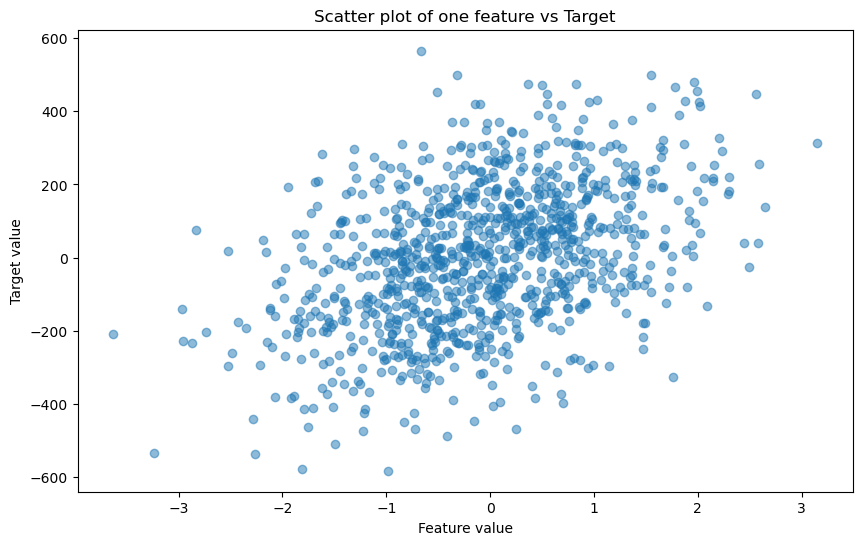

In [10]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
feature = X[:, 0]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(feature, y, alpha=0.5)
plt.title('Scatter plot of one feature vs Target')
plt.xlabel('Feature value')
plt.ylabel('Target value')
plt.show()

In [11]:

# Create pipeline to scale features
pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the SVR model on the training data
pipeline.fit(X_train, y_train)

# Predict using the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 35099.850585047876
